# Clasificacion de pacientes

Célien Bonhomme  
Daniel Mendoza  
Camilo Salgado  
Mateo Arcieri  
Yassary Garcia

In [1]:
import pandas as pd

/tmp/ipykernel_72227/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load data

In [2]:
df_patientes = pd.read_csv('pacientes.csv')
df_patientes.head()

,nombre del paciente,edad,indicador vascular,indicador de herencia,riesgo de infarto,riesgo vascular
0,bab18dc2-7792-44be-804b-eee4f6eac53a,11,7.8,1.4,311.957642,RIESGO BAJO
1,bffde512-e0c2-4f07-b397-6303cb940bca,-1,-1.0,-1.0,-39.957949,RIESGO BAJO
2,b61767aa-32ea-4eff-a106-7c698e808c35,-1,-1.0,-1.0,-40.002866,RIESGO BAJO
3,a3be7c33-a106-48c4-8fd2-ca2ed5444f64,-1,-1.0,-1.0,-40.045207,RIESGO BAJO
4,4e9886f7-deea-4de5-b89d-47f436962f9f,-1,-1.0,-1.0,-40.067218,RIESGO BAJO


# EDA

La columna nombre de paciente es irrelevente entonces podemos eliminarla.

In [3]:
df_patientes.drop('nombre del paciente', axis=1, inplace=True)


## Pairplot

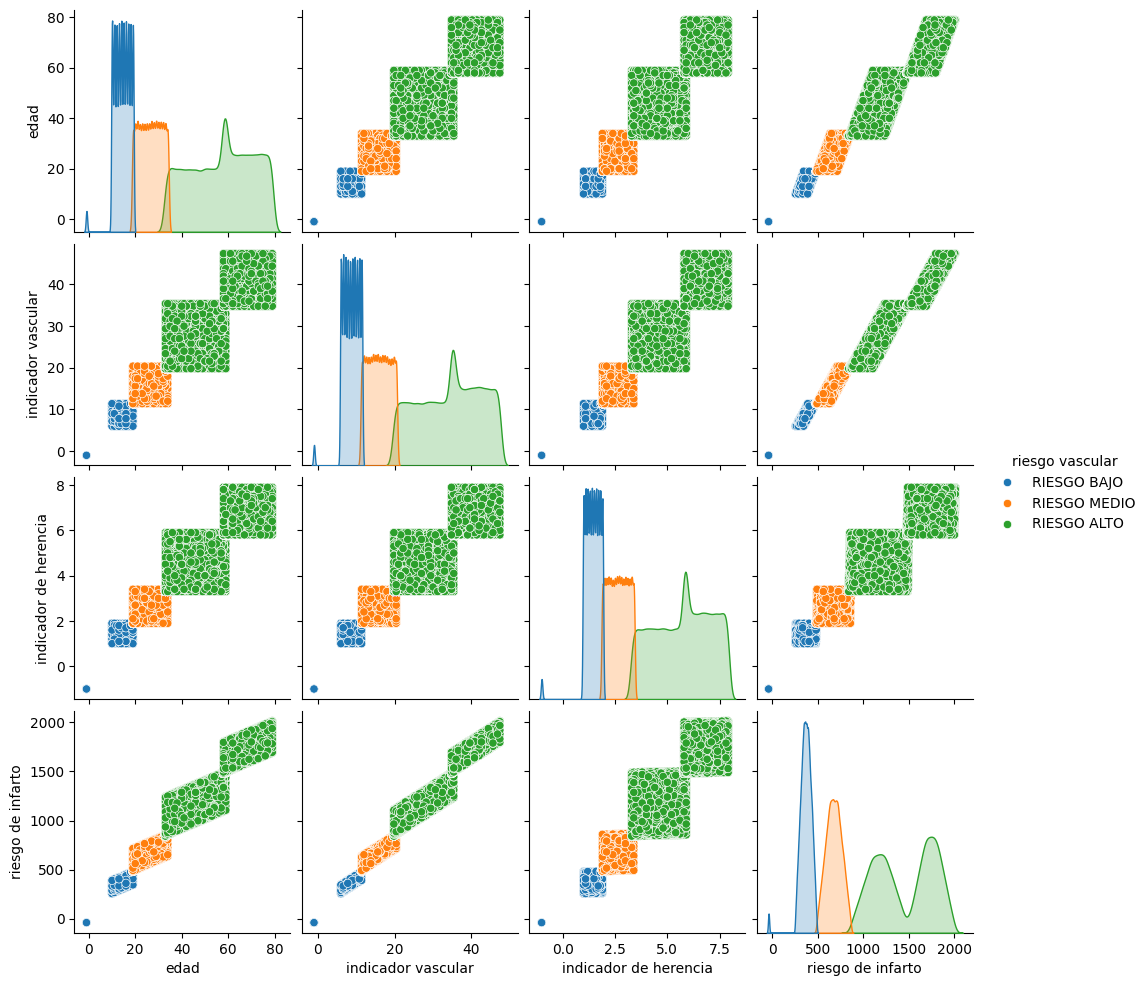

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_patientes, hue='riesgo vascular')
plt.show()

## Boxplot

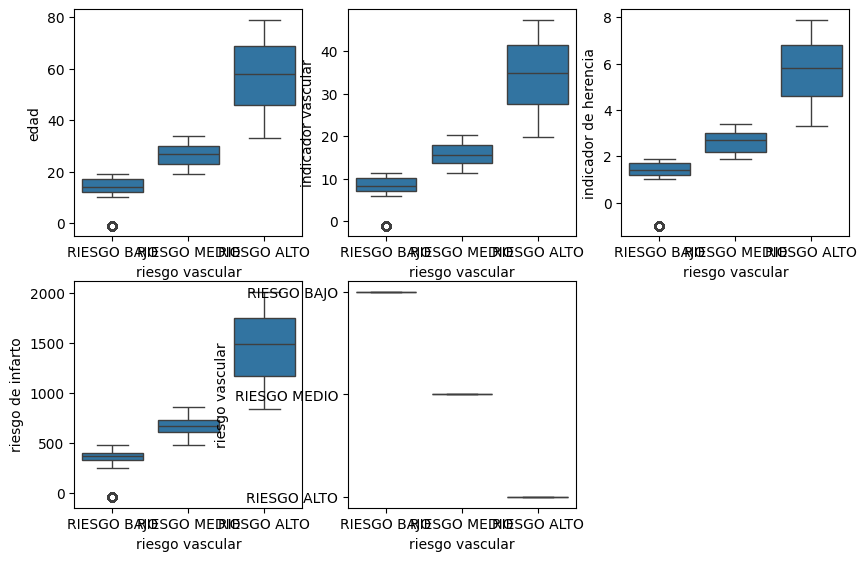

In [5]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(df_patientes.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='riesgo vascular', y=column, data=df_patientes)

# Preprocesamiento de datos faltantes

In [6]:
import warnings
warnings.filterwarnings('ignore')

df_patientes['edad'].replace(-1, None, inplace=True)
df_patientes['indicador vascular'].replace(-1, None, inplace=True)
df_patientes['indicador de herencia'].replace(-1, None, inplace=True)

In [7]:
df_patientes.head()

,edad,indicador vascular,indicador de herencia,riesgo de infarto,riesgo vascular
0,11,7.8,1.4,311.957642,RIESGO BAJO
1,None,None,None,-39.957949,RIESGO BAJO
2,None,None,None,-40.002866,RIESGO BAJO
3,None,None,None,-40.045207,RIESGO BAJO
4,None,None,None,-40.067218,RIESGO BAJO


# Entrenamiento

In [8]:
input = ['edad', 'indicador vascular', 'indicador de herencia']
output = ['riesgo vascular']

In [9]:
df_patientes['riesgo vascular'].unique()

array(['RIESGO BAJO', 'RIESGO MEDIO', 'RIESGO ALTO'], dtype=object)

## Sin imputacion

In [10]:
df_patientes_wNan = df_patientes.dropna()

In [11]:
from sklearn.model_selection import train_test_split

dfInputs = df_patientes_wNan[input]
dfOutputs = df_patientes_wNan[output]

dfTrainInputs, dfTestInputs, dfTrainOutputs, dfTestOutputs = train_test_split(dfInputs, dfOutputs, test_size=0.2, random_state=42)

### Regression logistica

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(dfTrainInputs, dfTrainOutputs)
score = model.score(dfTestInputs, dfTestOutputs)

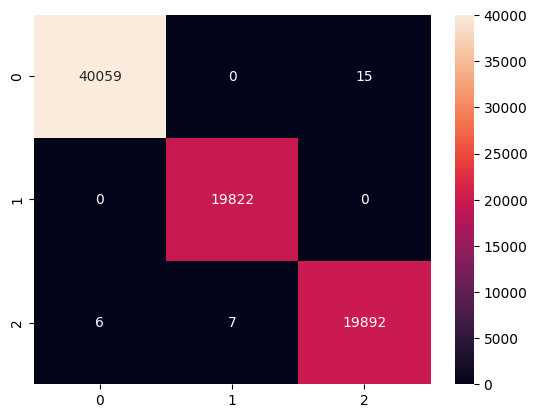

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

dfTestOutputsPred = model.predict(dfTestInputs)

cm = confusion_matrix(dfTestOutputs, dfTestOutputsPred)
sns.heatmap(cm, annot=True, fmt="d");


#### Accuracy

In [14]:
from sklearn.metrics import accuracy_score

score = accuracy_score(dfTestOutputs, dfTestOutputsPred)
print('Accuracy:', round(score, 4))

Accuracy: 0.9996


#### Precision

In [15]:
from sklearn.metrics import precision_score

for class_ in ['RIESGO BAJO', 'RIESGO MEDIO', 'RIESGO ALTO']:
    y_real = [1 if y == class_ else 0 for y in dfTestOutputs.values.flatten()]
    y_pred = [1 if y == class_ else 0 for y in dfTestOutputsPred]
    score = precision_score(y_real, y_pred)
    print(f'Precision for {class_}:', round(score, 4))


Precision for RIESGO BAJO: 0.9996
Precision for RIESGO MEDIO: 0.9992
Precision for RIESGO ALTO: 0.9999


#### Recall

In [16]:
from sklearn.metrics import recall_score

for class_ in ['RIESGO BAJO', 'RIESGO MEDIO', 'RIESGO ALTO']:
    y_real = [1 if y == class_ else 0 for y in dfTestOutputs.values.flatten()]
    y_pred = [1 if y == class_ else 0 for y in dfTestOutputsPred]
    score = recall_score(y_real, y_pred)
    print(f'Precision for {class_}:', round(score, 4))


Precision for RIESGO BAJO: 1.0
Precision for RIESGO MEDIO: 0.9993
Precision for RIESGO ALTO: 0.9996


### Soporte vectorial

In [17]:
from sklearn.svm import SVC

model = SVC()
model.fit(dfTrainInputs, dfTrainOutputs)
score = model.score(dfTestInputs, dfTestOutputs)

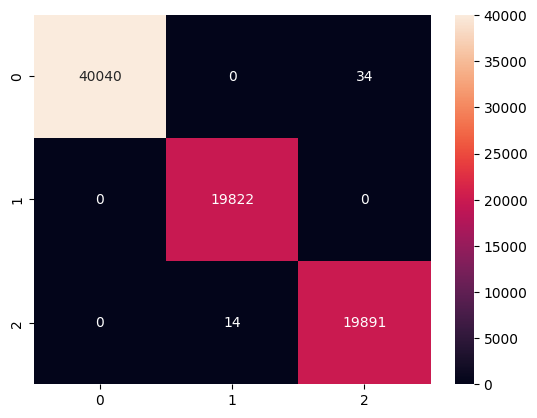

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

dfTestOutputsPred = model.predict(dfTestInputs)

cm = confusion_matrix(dfTestOutputs, dfTestOutputsPred)
sns.heatmap(cm, annot=True, fmt="d");


#### Accuracy

In [19]:
from sklearn.metrics import accuracy_score

score = accuracy_score(dfTestOutputs, dfTestOutputsPred)
print('Accuracy:', round(score, 4))

Accuracy: 0.9994


#### Precision

In [20]:
from sklearn.metrics import precision_score

for class_ in ['RIESGO BAJO', 'RIESGO MEDIO', 'RIESGO ALTO']:
    y_real = [1 if y == class_ else 0 for y in dfTestOutputs.values.flatten()]
    y_pred = [1 if y == class_ else 0 for y in dfTestOutputsPred]
    score = precision_score(y_real, y_pred)
    print(f'Precision for {class_}:', round(score, 4))


Precision for RIESGO BAJO: 0.9993
Precision for RIESGO MEDIO: 0.9983
Precision for RIESGO ALTO: 1.0


#### Recall

In [21]:
from sklearn.metrics import recall_score

for class_ in ['RIESGO BAJO', 'RIESGO MEDIO', 'RIESGO ALTO']:
    y_real = [1 if y == class_ else 0 for y in dfTestOutputs.values.flatten()]
    y_pred = [1 if y == class_ else 0 for y in dfTestOutputsPred]
    score = recall_score(y_real, y_pred)
    print(f'Precision for {class_}:', round(score, 4))


Precision for RIESGO BAJO: 1.0
Precision for RIESGO MEDIO: 0.9993
Precision for RIESGO ALTO: 0.9992


### Arbol de decision

In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(dfTrainInputs, dfTrainOutputs)
score = model.score(dfTestInputs, dfTestOutputs)

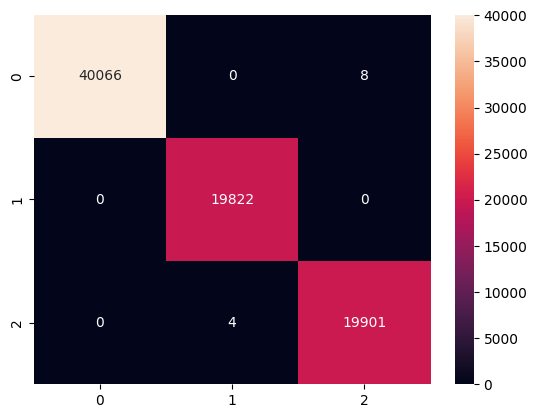

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

dfTestOutputsPred = model.predict(dfTestInputs)

cm = confusion_matrix(dfTestOutputs, dfTestOutputsPred)
sns.heatmap(cm, annot=True, fmt="d");


#### Accuracy

In [24]:
from sklearn.metrics import accuracy_score

score = accuracy_score(dfTestOutputs, dfTestOutputsPred)
print('Accuracy:', round(score, 4))

Accuracy: 0.9998


#### Precision

In [25]:
from sklearn.metrics import precision_score

for class_ in ['RIESGO BAJO', 'RIESGO MEDIO', 'RIESGO ALTO']:
    y_real = [1 if y == class_ else 0 for y in dfTestOutputs.values.flatten()]
    y_pred = [1 if y == class_ else 0 for y in dfTestOutputsPred]
    score = precision_score(y_real, y_pred)
    print(f'Precision for {class_}:', round(score, 4))


Precision for RIESGO BAJO: 0.9998
Precision for RIESGO MEDIO: 0.9996
Precision for RIESGO ALTO: 1.0


#### Recall

In [26]:
from sklearn.metrics import recall_score

for class_ in ['RIESGO BAJO', 'RIESGO MEDIO', 'RIESGO ALTO']:
    y_real = [1 if y == class_ else 0 for y in dfTestOutputs.values.flatten()]
    y_pred = [1 if y == class_ else 0 for y in dfTestOutputsPred]
    score = recall_score(y_real, y_pred)
    print(f'Precision for {class_}:', round(score, 4))


Precision for RIESGO BAJO: 1.0
Precision for RIESGO MEDIO: 0.9998
Precision for RIESGO ALTO: 0.9998


## Con imputacion

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(df_patientes[input])
dfInputs = imputer.transform(df_patientes[input])
dfInputs = pd.DataFrame(dfInputs, columns=input)

In [28]:
dfInputs

,edad,indicador vascular,indicador de herencia
0,11.0,7.8,1.4
1,34.0,20.4,3.4
2,34.0,20.4,3.4
3,34.0,20.4,3.4
4,34.0,20.4,3.4
...,...,...,...
399995,68.0,45.6,7.5
399996,61.0,47.4,7.3
399997,62.0,45.6,5.9
399998,68.0,46.8,6.3


In [29]:
dfInputs.head(20)

,edad,indicador vascular,indicador de herencia
0,11.0,7.8,1.4
1,34.0,20.4,3.4
2,34.0,20.4,3.4
3,34.0,20.4,3.4
4,34.0,20.4,3.4
5,34.0,20.4,3.4
6,34.0,20.4,3.4
7,34.0,20.4,3.4
8,34.0,20.4,3.4
9,34.0,20.4,3.4


In [30]:
from sklearn.model_selection import train_test_split

dfInputs = dfInputs[input]
dfOutputs = df_patientes[output]

dfTrainInputs, dfTestInputs, dfTrainOutputs, dfTestOutputs = train_test_split(dfInputs, dfOutputs, test_size=0.2, random_state=42)

### Regression logistica

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(dfTrainInputs, dfTrainOutputs)
score = model.score(dfTestInputs, dfTestOutputs)

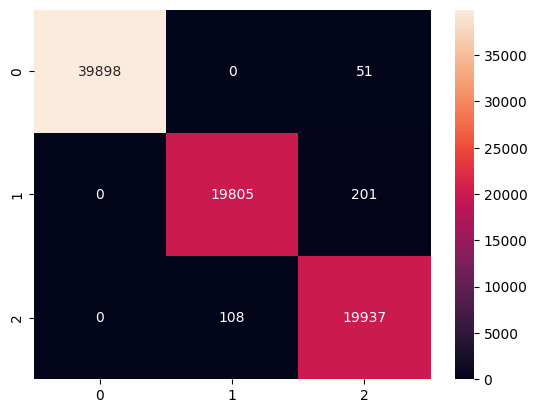

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

dfTestOutputsPred = model.predict(dfTestInputs)

cm = confusion_matrix(dfTestOutputs, dfTestOutputsPred)
sns.heatmap(cm, annot=True, fmt="d");


#### Accuracy

In [33]:
from sklearn.metrics import accuracy_score

score = accuracy_score(dfTestOutputs, dfTestOutputsPred)
print('Accuracy:', round(score, 4))

Accuracy: 0.9955


#### Precision

In [34]:
from sklearn.metrics import precision_score

for class_ in ['RIESGO BAJO', 'RIESGO MEDIO', 'RIESGO ALTO']:
    y_real = [1 if y == class_ else 0 for y in dfTestOutputs.values.flatten()]
    y_pred = [1 if y == class_ else 0 for y in dfTestOutputsPred]
    score = precision_score(y_real, y_pred)
    print(f'Precision for {class_}:', round(score, 4))


Precision for RIESGO BAJO: 0.9946
Precision for RIESGO MEDIO: 0.9875
Precision for RIESGO ALTO: 1.0


#### Recall

In [35]:
from sklearn.metrics import recall_score

for class_ in ['RIESGO BAJO', 'RIESGO MEDIO', 'RIESGO ALTO']:
    y_real = [1 if y == class_ else 0 for y in dfTestOutputs.values.flatten()]
    y_pred = [1 if y == class_ else 0 for y in dfTestOutputsPred]
    score = recall_score(y_real, y_pred)
    print(f'Precision for {class_}:', round(score, 4))


Precision for RIESGO BAJO: 0.99
Precision for RIESGO MEDIO: 0.9946
Precision for RIESGO ALTO: 0.9987


### Soporte vectorial

In [36]:
from sklearn.svm import SVC

model = SVC()
model.fit(dfTrainInputs, dfTrainOutputs)
score = model.score(dfTestInputs, dfTestOutputs)

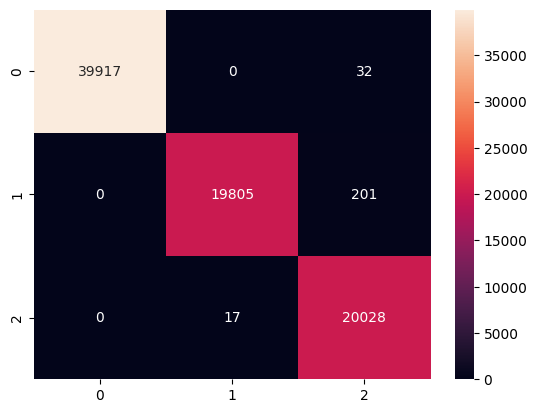

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

dfTestOutputsPred = model.predict(dfTestInputs)

cm = confusion_matrix(dfTestOutputs, dfTestOutputsPred)
sns.heatmap(cm, annot=True, fmt="d");


#### Accuracy

In [38]:
from sklearn.metrics import accuracy_score

score = accuracy_score(dfTestOutputs, dfTestOutputsPred)
print('Accuracy:', round(score, 4))

Accuracy: 0.9969


#### Precision

In [39]:
from sklearn.metrics import precision_score

for class_ in ['RIESGO BAJO', 'RIESGO MEDIO', 'RIESGO ALTO']:
    y_real = [1 if y == class_ else 0 for y in dfTestOutputs.values.flatten()]
    y_pred = [1 if y == class_ else 0 for y in dfTestOutputsPred]
    score = precision_score(y_real, y_pred)
    print(f'Precision for {class_}:', round(score, 4))


Precision for RIESGO BAJO: 0.9991
Precision for RIESGO MEDIO: 0.9885
Precision for RIESGO ALTO: 1.0


#### Recall

In [40]:
from sklearn.metrics import recall_score

for class_ in ['RIESGO BAJO', 'RIESGO MEDIO', 'RIESGO ALTO']:
    y_real = [1 if y == class_ else 0 for y in dfTestOutputs.values.flatten()]
    y_pred = [1 if y == class_ else 0 for y in dfTestOutputsPred]
    score = recall_score(y_real, y_pred)
    print(f'Precision for {class_}:', round(score, 4))


Precision for RIESGO BAJO: 0.99
Precision for RIESGO MEDIO: 0.9992
Precision for RIESGO ALTO: 0.9992


### Arbol de decision

In [41]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(dfTrainInputs, dfTrainOutputs)
score = model.score(dfTestInputs, dfTestOutputs)

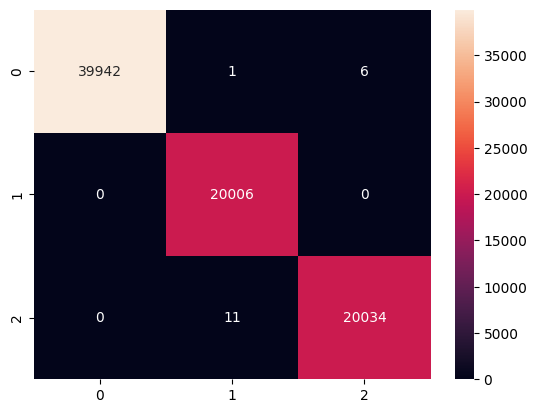

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

dfTestOutputsPred = model.predict(dfTestInputs)

cm = confusion_matrix(dfTestOutputs, dfTestOutputsPred)
sns.heatmap(cm, annot=True, fmt="d");


#### Accuracy

In [43]:
from sklearn.metrics import accuracy_score

score = accuracy_score(dfTestOutputs, dfTestOutputsPred)
print('Accuracy:', round(score, 4))

Accuracy: 0.9998


#### Precision

In [44]:
from sklearn.metrics import precision_score

for class_ in ['RIESGO BAJO', 'RIESGO MEDIO', 'RIESGO ALTO']:
    y_real = [1 if y == class_ else 0 for y in dfTestOutputs.values.flatten()]
    y_pred = [1 if y == class_ else 0 for y in dfTestOutputsPred]
    score = precision_score(y_real, y_pred)
    print(f'Precision for {class_}:', round(score, 4))


Precision for RIESGO BAJO: 0.9994
Precision for RIESGO MEDIO: 0.9997
Precision for RIESGO ALTO: 1.0


#### Recall

In [45]:
from sklearn.metrics import recall_score

for class_ in ['RIESGO BAJO', 'RIESGO MEDIO', 'RIESGO ALTO']:
    y_real = [1 if y == class_ else 0 for y in dfTestOutputs.values.flatten()]
    y_pred = [1 if y == class_ else 0 for y in dfTestOutputsPred]
    score = recall_score(y_real, y_pred)
    print(f'Precision for {class_}:', round(score, 4))


Precision for RIESGO BAJO: 1.0
Precision for RIESGO MEDIO: 0.9995
Precision for RIESGO ALTO: 0.9998
